In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import math

In [2]:
def printMR(name, x):
    display("{} - mean: {:.4f} var: {:.4f}".format(name, np.mean(x), np.var(x)))

'X[n] - mean: -0.0963 var: 2.4611'

'Y[n] - mean: 2.4037 var: 3.5316'

'Z[n] - mean: -1.0000 var: 7.7259'

'V[n] - mean: -0.0681 var: 1.2306'

y[n+k-1]*y[n-1] - y[n+k-1]*y[n] + y[n+k-1] - y[n+k]*y[n-1] + y[n+k]*y[n] - y[n+k] + y[n-1] - y[n] + 1

Abs(y[n] - 1)

1.0 + exp(-4.0*I*pi*f) + 2.0*exp(-2.0*I*pi*f)

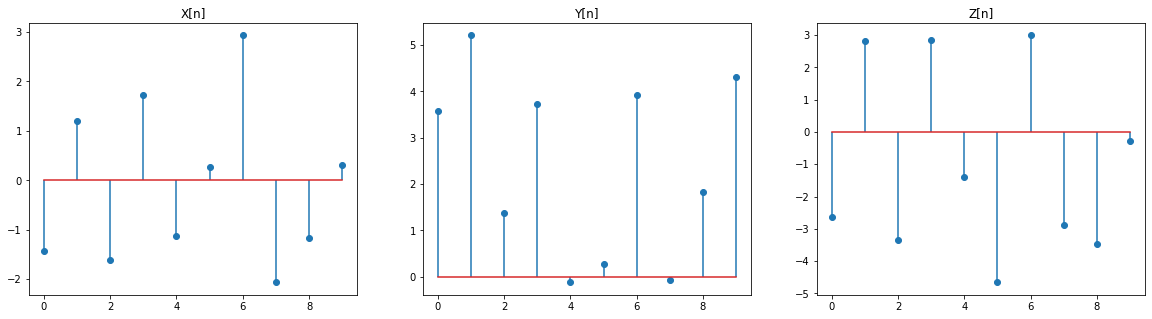

In [3]:
# Problem 1
## Standard stuff
S = 10

## Generate X-axis (n's)
Ns = np.arange(-1*S/2, S/2)

## X(n) = N(0,2)
XnMean = 0
XnSigma = math.sqrt(2)
Xn = np.random.normal(XnMean, XnSigma, S)

## V(n) = N(0,1)
VnMean = 0
VnSigma = 1
Vn = np.random.normal(VnMean, VnSigma, S)
## make a set of realisations based on Vn that looks like Xn

## 1.1
Xn = XnMean+XnSigma*Vn
## Y(n) = |n| + X(n)
Yn = abs(Ns) + Xn
## Z(n) = Y(n)-Y(n-1)-1
Zn = Yn - np.roll(Yn, -1)-1

printMR("X[n]", Xn)
printMR("Y[n]", Yn)
printMR("Z[n]", Zn)
printMR("V[n]", Vn)

## 1.2
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
for i, rel in enumerate([["X[n]", Xn], ["Y[n]", Yn], ["Z[n]", Zn]]):
    ax[i].set_title(rel[0])
    ax[i].stem(rel[1], use_line_collection=True)

## 1.5
yn, yn1, ynk, ynk1 = sp.symbols("y[n] y[n-1] y[n+k] y[n+k-1]")
exp = (yn-yn1-1)*(ynk-ynk1-1)
display(exp.expand())
display(abs(yn-1).evalf())

## 1.6
f = sp.symbols("f")
Hf = (1+sp.cos(2*sp.pi*f)-1j*sp.sin(2*sp.pi*f))
Hf = (1+sp.exp(-1j*2*sp.pi*f))
Hf2 = Hf**2
display(Hf2.expand().simplify().evalf())

In [4]:
# Problem 2
x = sp.symbols("x")
exp = 45*(1-x**2)

## 2.1
mean = sp.integrate(exp, (x, 0, 1))
display(mean)

## 2.2
campbellMean = sp.integrate(x**2*exp, (x, 0, 1))
display(campbellMean)

## 2.3
pMax = 0.8
pMaxX = sp.sqrt(pMax)
meanRange = sp.integrate(exp, (x, pMaxX, 1))
display(meanRange)

## 2.4
k = 0
1-sp.exp(-meanRange)*(((meanRange)**k)/(sp.factorial(k)))

## 2.5
N = 30
n = 0
p = meanRange/mean
display(p)

#N, n, p = sp.symbols("N n p")
(sp.factorial(N)/(sp.factorial(n)*sp.factorial(N-n)))*p**n*(1-p)**(N-n)

30

6

0.483902697002772

0.0161300899000924

0.613946262156210

In [20]:
# Problem 3
lamb = sp.symbols("\lambda")
x = sp.symbols("x")
expX = lamb*sp.exp(-lamb*x)
expRate = 1/(lamb*sp.log(2))
display(expRate)

## 3.1
display("3.1")
ELamb = sp.integrate(lamb*expRate, (lamb, 1, 2))
Elamb2 = sp.integrate(lamb**2*expRate, (lamb, 1, 2))
varLamb = (Elamb2 - ELamb**2)
display(ELamb, Elamb2, varLamb)

## 3.2
display("3.2")
#EXLamb = sp.integrate(sp.integrate(expX*expRate, (lamb, 1, 2)), (x, 0, sp.oo))
#display(EXLamb)

## 3.3
display("3.3")
ELambX = 1
EX = 1/(2*sp.log(2))
VarX = (3/(4*sp.log(2)))-(1/((2*sp.log(2))**2))
CovXX = VarX
CovLambX = ELambX-ELamb*EX
display(VarX, CovXX, CovLambX)

mseLamb = varLamb-CovLambX*VarX**(-1)*CovLambX
display(mseLamb.evalf())

1/(\lambda*log(2))

'3.1'

1/log(2)

3/(2*log(2))

-1/log(2)**2 + 3/(2*log(2))

'3.2'

'3.3'

-1/(4*log(2)**2) + 3/(4*log(2))

-1/(4*log(2)**2) + 3/(4*log(2))

1 - 1/(2*log(2)**2)

0.0797266521658331